In [5]:
import numpy as np
import pandas_datareader as web
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import math
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Bidirectional
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import RegressorMixin

In [8]:
df = yf.Ticker("AAPL")

In [9]:
df = df.history(period="max")

In [10]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-30 00:00:00-04:00,176.960007,178.990005,176.570007,177.300003,55964400,0.0,0.0
2023-05-31 00:00:00-04:00,177.330002,179.350006,176.759995,177.250000,99625300,0.0,0.0
2023-06-01 00:00:00-04:00,177.699997,180.119995,176.929993,180.089996,68901800,0.0,0.0


In [11]:
df.shape

(10709, 7)

In [12]:
fig = go.Figure(data=go.Scatter(x=df.index, y=df['Close'], mode='lines'))

fig.update_layout(
    title='Close Price History',
    xaxis=dict(title='Date', showgrid=False),
    yaxis=dict(title='Close Price USD ($)', showgrid=False),
    width=1200,
    height=600
)

fig.show()

In [13]:
fig = go.Figure(data=go.Scatter(x=df.index, y=df['Open'], mode='lines'))

fig.update_layout(
    title='Open Price History',
    xaxis=dict(title='Date', showgrid=True),
    yaxis=dict(title='Open Price USD ($)', showgrid=True),
    width=1200,
    height=600
)

fig.show()

In [14]:
data = df.filter(['Close'])

In [15]:
dataset = data.values

In [16]:
training_data_len = math.ceil(len(dataset)*.8)

In [17]:
training_data_len

8568

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [19]:
scaled_data

array([[3.39846225e-04],
       [3.11128740e-04],
       [2.72834327e-04],
       ...,
       [9.95246301e-01],
       [1.00000000e+00],
       [9.92427280e-01]])

In [20]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00033985, 0.00031113, 0.00027283, 0.0002848 , 0.00029916,
       0.00033027, 0.0003566 , 0.00038053, 0.00041164, 0.00046908,
       0.00047866, 0.0004619 , 0.00044276, 0.00044994, 0.00043558,
       0.00040686, 0.00038053, 0.00036857, 0.00039968, 0.00039489,
       0.00037335, 0.00037575, 0.00038771, 0.00038293, 0.00041882,
       0.00039968, 0.00041164, 0.00041882, 0.00041643, 0.00040686,
       0.00040207, 0.00038293, 0.00036139, 0.00033027, 0.00029916,
       0.00031831, 0.00033745, 0.00033745, 0.00033985, 0.00031113,
       0.00031113, 0.00029438, 0.00028959, 0.00027762, 0.00028959,
       0.00031113, 0.00028001, 0.00025369, 0.00026087, 0.00024412,
       0.00027283, 0.00028001, 0.00029677, 0.00029916, 0.00029198,
       0.00028719, 0.0002848 , 0.00028001, 0.00024172, 0.00022018])]
[0.00020342909212979555]

[array([0.00033985, 0.00031113, 0.00027283, 0.0002848 , 0.00029916,
       0.00033027, 0.0003566 , 0.00038053, 0.00041164, 0.00046908,
       0.00047866, 0.0004619 , 0

In [21]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
X_train.shape

(8508, 60, 1)

In [23]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [163]:
model.fit(X_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
133/133 [==============================] - 19s 141ms/step - loss: 1.9384e-06
Epoch 2/5
133/133 [==============================] - 18s 137ms/step - loss: 1.8905e-06
Epoch 3/5
133/133 [==============================] - 18s 135ms/step - loss: 2.1975e-06
Epoch 4/5
133/133 [==============================] - 19s 141ms/step - loss: 2.3846e-06
Epoch 5/5
133/133 [==============================] - 24s 182ms/step - loss: 1.9865e-06


In [25]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [26]:
x_test = np.array(x_test)

In [27]:
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
prediction = model.predict(x_test)
prediction =scaler.inverse_transform(prediction)

In [160]:
rmse=np.sqrt(np.mean(((prediction- y_test)**2)))

In [161]:
rmse

4.092291504614165

In [162]:
mae = np.mean(np.abs(prediction - y_test))
mae

2.6039512265457945

In [49]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
266/266 [==============================] - 31s 100ms/step - loss: 2.8115e-05
Epoch 2/20
266/266 [==============================] - 26s 99ms/step - loss: 1.3032e-05
Epoch 3/20
266/266 [==============================] - 25s 95ms/step - loss: 1.1535e-05
Epoch 4/20
266/266 [==============================] - 26s 97ms/step - loss: 1.1045e-05
Epoch 5/20
266/266 [==============================] - 25s 95ms/step - loss: 1.0175e-05
Epoch 6/20
266/266 [==============================] - 25s 95ms/step - loss: 1.0776e-05
Epoch 7/20
266/266 [==============================] - 25s 95ms/step - loss: 1.1279e-05
Epoch 8/20
266/266 [==============================] - 28s 106ms/step - loss: 9.5630e-06
Epoch 9/20
266/266 [==============================] - 25s 95ms/step - loss: 1.0799e-05
Epoch 10/20
266/266 [==============================] - 25s 96ms/step - loss: 1.0094e-05
Epoch 11/20
266/266 [==============================] - 25s 95ms/step - loss: 9.9749e-06
Epoch 12/20
266/266 [==================

In [44]:
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [45]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)
rmse = np.sqrt(mean_squared_error(y_test, prediction))

67/67 [==============================] - 4s 35ms/step


In [48]:
print("RMSE: ", rmse)

RMSE: 3.198643181600498 


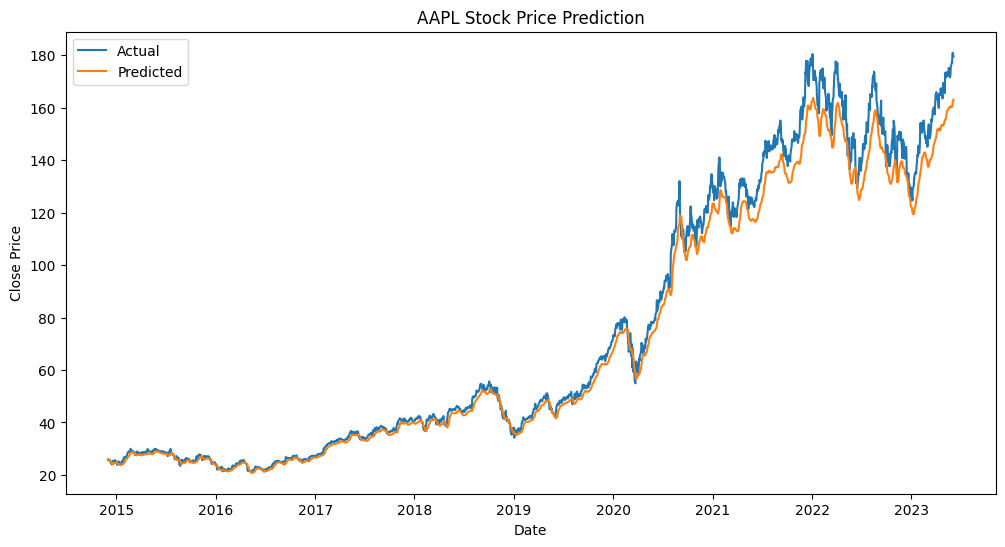

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data.index[training_data_len:], y_test, label='Actual')
plt.plot(data.index[training_data_len:], prediction, label='Predicted')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

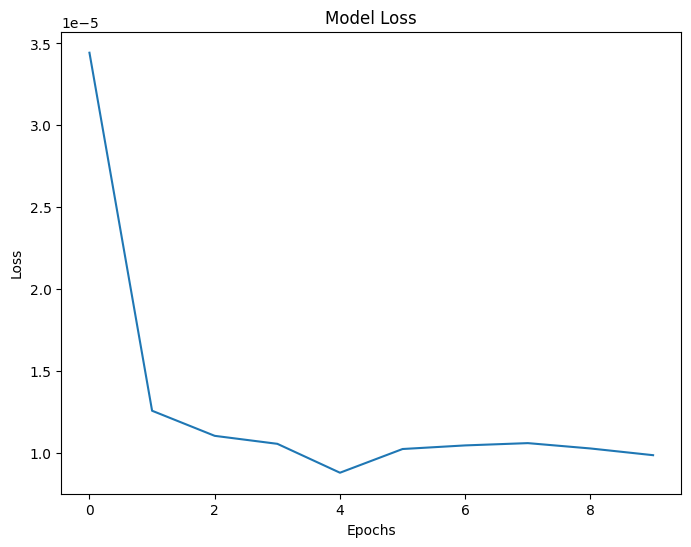

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [139]:
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=32, epochs=5)

test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE:', rmse)

Epoch 1/5
266/266 [==============================] - 51s 161ms/step - loss: 3.3115e-05
Epoch 2/5
266/266 [==============================] - 48s 179ms/step - loss: 1.0002e-05
Epoch 3/5
266/266 [==============================] - 48s 178ms/step - loss: 9.1910e-06
Epoch 4/5
266/266 [==============================] - 44s 164ms/step - loss: 8.7547e-06
Epoch 5/5
67/67 [==============================] - 4s 38ms/step
RMSE: 4.936959696681906


In [142]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=5)

test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE:', rmse)

Epoch 1/5
8507/8507 [==============================] - 18s 2ms/step - loss: 3.2384e-05
Epoch 2/5
8507/8507 [==============================] - 17s 2ms/step - loss: 1.3035e-05
Epoch 3/5
8507/8507 [==============================] - 18s 2ms/step - loss: 1.0251e-05
Epoch 4/5
8507/8507 [==============================] - 17s 2ms/step - loss: 9.5260e-06
Epoch 5/5
67/67 [==============================] - 0s 2ms/step
RMSE: 7.301359499427578


In [22]:
class KerasRegressorWithScore(KerasRegressor, RegressorMixin):
    def score(self, X, y):
        y_pred = self.predict(X)
        return -mean_squared_error(y, y_pred) 

In [ ]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define the hyperparameters to tune
param_grid = {
    'batch_size': [32, 64, 128, 256],
    'epochs': [5, 10, 20, 30, 50, 80],
    'optimizer': ['adam', 'rmsprop', 'sgd']
}

# Create KerasRegressorWithScore with create_model function
model = KerasRegressorWithScore(build_fn=create_model)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

<ipython-input-23-ef85cbc3acd6>:18: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Epoch 1/5
178/178 [==============================] - 20s 87ms/step - loss: 4.5219e-05
Epoch 2/5
178/178 [==============================] - 16s 91ms/step - loss: 2.8160e-06
Epoch 3/5
178/178 [==============================] - 16s 88ms/step - loss: 3.3001e-06
Epoch 4/5
178/178 [==============================] - 17s 93ms/step - loss: 3.1776e-06
Epoch 5/5
89/89 [==============================] - 3s 28ms/step
Epoch 1/5
178/178 [==============================] - 21s 88ms/step - loss: 4.6403e-05
Epoch 2/5
178/178 [==============================] - 16s 88ms/step - loss: 2.9551e-06
Epoch 3/5
178/178 [==============================] - 16s 88ms/step - loss: 2.8697e-06
Epoch 4/5
178/178 [==============================] - 17s 95ms/step - loss: 2.8240e-06
Epoch 5/5
89/89 [==============================] - 3s 26ms/step
Epoch 1/5
178/178 [==============================] - 21s 89ms/step - loss: 1.4060e-05
Epoch 2/5
178/178 [==============================] - 15s 87ms/step - loss: 5.4900e-07
Epoch 3/5
17

In [ ]:

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Build the model with the best hyperparameters
best_model = create_model(optimizer=grid_search.best_params_['optimizer'])

# Train the model with the best hyperparameters
best_model.fit(x_train, y_train, batch_size=grid_search.best_params_['batch_size'], epochs=grid_search.best_params_['epochs'])

test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
prediction = best_model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

ma